In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("HIV_dataset.csv")
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,ZDV + ddI,37,79.46339,no,yes,no,100,no,yes,...,experienced,> 1 but <= 52 weeks of prior antiretroviral th...,asymp,others,no,322,469,882,754,yes
1,324,ZDV only,33,73.02314,no,yes,no,90,no,yes,...,experienced,> 52 weeks,symp,others,yes,168,575,1035,1525,yes
2,495,ZDV + ddI,43,69.47793,no,yes,no,100,no,yes,...,experienced,Antiretroviral Naive,asymp,ZDV only,no,377,333,1147,1088,yes
3,1201,ddI only,42,89.15934,no,yes,no,100,yes,yes,...,experienced,> 52 weeks,asymp,ZDV only,no,238,324,775,1019,yes
4,934,ZDV only,37,137.46581,no,yes,no,100,no,no,...,naive,> 52 weeks,asymp,ZDV only,yes,500,443,1601,849,no


In [3]:
df.shape

(50000, 23)

In [4]:
df.describe()

,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,34.164020,75.861991,96.831560,318.159560,319.079540,438.090100,1045.936440,905.938440
std,307.288688,7.091152,12.028730,5.091788,402.932765,102.525976,144.806831,488.617434,339.707976
min,66.000000,12.000000,42.361620,76.000000,0.000000,0.000000,81.000000,96.000000,173.000000
25%,542.000000,29.000000,68.253682,90.000000,0.000000,236.000000,327.000000,713.000000,649.000000
50%,1045.000000,34.000000,74.054115,100.000000,123.000000,299.000000,415.000000,885.000000,858.000000
75%,1136.000000,39.000000,81.142185,100.000000,503.000000,396.000000,531.000000,1245.000000,1084.000000
max,1231.000000,68.000000,149.830870,100.000000,2828.000000,930.000000,1119.000000,4656.000000,3538.000000


In [5]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [6]:
cat_var=['trt','hemo','homo','drugs','oprior','z30','race','gender','str2','strat','symptom','treat','offtrt','infected']

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Iterate over each categorical column and replace values with encoded values
for col in cat_var:
    # Use LabelEncoder to encode the categorical variable
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Display the DataFrame with encoded categorical variables
print(df)

       time  trt  age       wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0      1073    1   37   79.46339     0     1      0     100       0    1  ...   
1       324    2   33   73.02314     0     1      0      90       0    1  ...   
2       495    1   43   69.47793     0     1      0     100       0    1  ...   
3      1201    3   42   89.15934     0     1      0     100       1    1  ...   
4       934    2   37  137.46581     0     1      0     100       0    0  ...   
...     ...  ...  ...        ...   ...   ...    ...     ...     ...  ...  ...   
49995   953    3   46   61.28204     0     0      0      90       0    1  ...   
49996  1036    2   42   73.36768     0     1      0     100       0    1  ...   
49997  1157    2   40   78.75824     0     1      0     100       0    1  ...   
49998   596    2   31   52.20371     0     0      0     100       0    1  ...   
49999   612    0   41   77.12100     0     1      0      90       0    1  ...   

       str2  strat  symptom

In [8]:
df.corr()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
time,1.000000,-0.006279,0.006911,0.039390,-0.019287,0.056241,-0.012310,0.021562,-0.021745,-0.074956,...,0.078147,0.084653,-0.019133,0.068051,-0.101019,0.040720,0.089658,0.018400,0.026256,-0.102671
trt,-0.006279,1.000000,-0.004711,0.020910,-0.002299,0.006526,0.004241,0.036747,0.005703,-0.010087,...,0.015536,0.015427,0.004093,-0.059555,-0.006638,0.008416,-0.006833,0.003165,-0.008718,0.021977
age,0.006911,-0.004711,1.000000,0.001856,-0.017836,0.108080,0.002495,-0.046430,0.011142,0.118811,...,-0.121492,-0.105048,0.001566,0.041837,-0.049142,-0.053918,-0.065441,0.005863,-0.001756,0.028718
wtkg,0.039390,0.020910,0.001856,1.000000,-0.034036,0.089131,-0.016851,0.008592,-0.004932,-0.106208,...,0.104913,0.082208,0.004827,0.001226,-0.029979,0.047813,0.066893,0.019929,-0.006143,-0.055527
hemo,-0.019287,-0.002299,-0.017836,-0.034036,1.000000,-0.068466,0.001203,-0.002599,0.013915,0.064002,...,-0.062104,-0.052092,-0.002698,0.008057,0.011043,-0.034345,-0.034451,-0.004844,-0.004207,0.026407
homo,0.056241,0.006526,0.108080,0.089131,-0.068466,1.000000,-0.051067,-0.011770,0.008095,-0.013145,...,0.010187,0.019204,0.022002,0.072673,-0.103003,0.000200,-0.010264,0.025367,-0.004070,-0.007341
drugs,-0.012310,0.004241,0.002495,-0.016851,0.001203,-0.051067,1.000000,0.010188,-0.010457,-0.033090,...,0.040928,0.024600,0.000906,-0.009026,0.037158,0.025400,0.027702,-0.005788,0.006794,-0.025684
karnof,0.021562,0.036747,-0.046430,0.008592,-0.002599,-0.011770,0.010188,1.000000,0.000356,-0.131726,...,0.136562,0.104453,0.008108,-0.053328,-0.025224,0.045776,0.062692,0.023325,0.013964,-0.025860
oprior,-0.021745,0.005703,0.011142,-0.004932,0.013915,0.008095,-0.010457,0.000356,1.000000,0.058107,...,-0.065423,-0.056146,0.017419,-0.011640,-0.008963,-0.041128,-0.042355,0.006786,-0.010503,0.043416
z30,-0.074956,-0.010087,0.118811,-0.106208,0.064002,-0.013145,-0.033090,-0.131726,0.058107,1.000000,...,-0.605567,-0.497383,0.022249,0.010907,-0.007565,-0.217151,-0.284487,-0.018809,0.001278,0.238531


<Axes: >

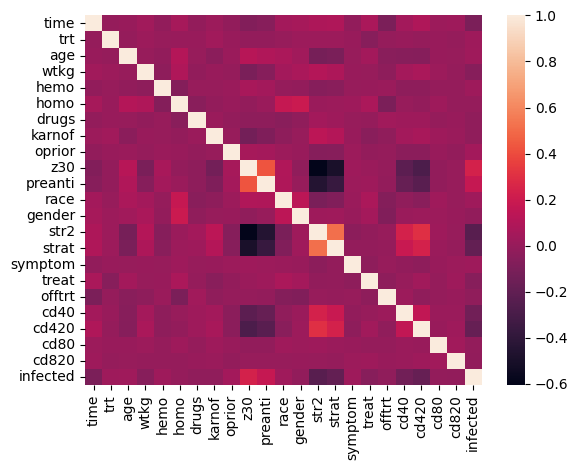

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into features and target
col=['infected','homo','cd80','cd820','race']
X = df.drop(col, axis=1)  # Features
y = df['infected']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(X_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)



c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6835 - loss: 0.5924 - val_accuracy: 0.7076 - val_loss: 0.5699
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7058 - loss: 0.5665 - val_accuracy: 0.7096 - val_loss: 0.5671
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7036 - loss: 0.5668 - val_accuracy: 0.7119 - val_loss: 0.5658
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7078 - loss: 0.5588 - val_accuracy: 0.7081 - val_loss: 0.5673
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7065 - loss: 0.5638 - val_accuracy: 0.7091 - val_loss: 0.5661
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7108 - loss: 0.5597 - val_accuracy: 0.7092 - val_loss: 0.5666
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7062 - loss: 0.5620 - val_accuracy: 0.7085 - val_loss: 0.5660
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7093 - loss: 0.5602 - 

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X contains your features and y contains your binary target variable (0 or 1)
# Split data into features and target
col=['infected','homo','cd80','cd820','race']
X = df.drop(col, axis=1)  # Features
y = df['infected']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.6934285714285714
Confusion Matrix:
[[11089   974]
 [ 4391  1046]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.92      0.81     12063
           1       0.52      0.19      0.28      5437

    accuracy                           0.69     17500
   macro avg       0.62      0.56      0.54     17500
weighted avg       0.65      0.69      0.64     17500



c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
unique_count = y_train.value_counts()
unique_count


infected
0    22431
1    10069
Name: count, dtype: int64